#Lead Scoring Case Study

####**Problem Statement**

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

There are a lot of leads generated in the initial stage, but only a few of them come out as paying customers. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

####**Goal of the Case Study**

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

We will also try to check if certain adjustments or recommendations can be made to ensure that we are suggesting the right business solutions to tackle in future problems as well.

In [2]:
# Importing necessary libraries

import numpy as np
import pandas as pd

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#import stats library
from scipy import stats
import statsmodels.api as sm

#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder

#import miscellaneous libraries
pd.set_option("display.max_columns",None)
pd.set_option("display.max_colwidth",200)

# Supress unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

####Reading and Understanding the Data

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Reading the Dataset
df = pd.read_csv("/content/drive/MyDrive/Leading Score Case Study/Leads.csv")

In [11]:
# Displaying the first five rows of the Dataframe
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [12]:
# Checking the shape of the Dataframe
df.shape

(9240, 37)

In [13]:
# Listing down the columns in the Dataframe
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [14]:
#Checking Null values and Data Type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

######Inference

- There are 4 columns with float data type.
- There are 2 columns with integer data type
- Remaining 31 are of Object data type.
- There are columns with count less than 9240, which means there are missing values in the data set.





In [15]:
# Statistical analysis of the Dataframe
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


####Data Cleaning

In [16]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [17]:
# Replacing Select with null values
df = df.replace('Select', np.nan)

We can see there are many values as 'Select' in place of missing data. Let's convert 'Select' with NaN to treat them as null values.

In [18]:
# Checking the number of missing values in each column
df.isnull().sum().sort_values(ascending=False)

,0
How did you hear about X Education,7250
Lead Profile,6855
Lead Quality,4767
Asymmetrique Profile Score,4218
Asymmetrique Activity Score,4218
Asymmetrique Activity Index,4218
Asymmetrique Profile Index,4218
City,3669
Specialization,3380
Tags,3353


In [19]:
# Storing columns with null values more than 30%
missing_perc = df.isnull().sum()/df.shape[0]*100
remove_cols = missing_perc[missing_perc >= 30]

In [20]:
# Storing columns with null values more than 30%
missing_perc = df.isnull().sum()/df.shape[0]*100
remove_cols = missing_perc[missing_perc >= 30]

In [21]:
df.drop(columns = remove_cols.index, inplace = True)
df.shape

(9240, 27)

Dropping columns with more than 30% of null values as a significant number of entries are missing and imputing these values might skew the analysis

In [22]:
#Checking columns with less than 3% of null values
missing_perc = df.isnull().sum()/df.shape[0]*100
missing_perc[(missing_perc < 3) & (missing_perc > 0)]

,0
Lead Source,0.389610
TotalVisits,1.482684
Page Views Per Visit,1.482684
Last Activity,1.114719


In [23]:
df = df[~df['Lead Source'].isnull()]
df = df[~df['TotalVisits'].isnull()]
df = df[~df['Page Views Per Visit'].isnull()]
df = df[~df['Last Activity'].isnull()]

Dropping rows with less than 3% of null values as they are fewer in number and removing them will yield a better analysis.

In [24]:
# Checking missing percentage for other columns
missing_perc = df.isnull().sum()/df.shape[0]*100
missing_perc[missing_perc > 0]

,0
Country,25.303064
What is your current occupation,29.567996
What matters most to you in choosing a course,29.777386


In [25]:
#Analyzing Country column
df.Country.value_counts(normalize=True)*100

,proportion
Country,
India,95.765713
United States,1.017999
United Arab Emirates,0.781942
Singapore,0.354087
Saudi Arabia,0.309826
United Kingdom,0.221304
Australia,0.191797
Qatar,0.147536
Hong Kong,0.103275


In the Country column, 25 percent of the data is missing and out of the existing data, 95% of the data shows India. This won't provide significant insights to our analysis, so it's better we drop it.

In [26]:
# dropping Country column
df.drop(['Country'], axis = 1, inplace = True)

In [27]:
# Check
df.shape

(9074, 26)

In [28]:
#Analyzing the column
df['What is your current occupation'].value_counts()

,count
What is your current occupation,
Unemployed,5476
Working Professional,677
Student,206
Other,15
Housewife,9
Businessman,8


In [29]:
# Replacing null values
df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan, 'Unemployed')

Replacing Null values with Unemployed as its the Mode.

In [30]:
# Analyzing the column
df['What matters most to you in choosing a course'].value_counts(normalize=True)*100

,proportion
What matters most to you in choosing a course,
Better Career Prospects,99.968613
Flexibility & Convenience,0.015694
Other,0.015694


In [31]:
# Dropping the column
df.drop(['What matters most to you in choosing a course'], axis = 1, inplace = True)

As seen above, no meaningful insights can be derived from the column. Hence, dropping it is the best solution.

In [32]:
# Verifying if all null values are removed
df.isnull().sum()

,0
Prospect ID,0
Lead Number,0
Lead Origin,0
Lead Source,0
Do Not Email,0
Do Not Call,0
Converted,0
TotalVisits,0
Total Time Spent on Website,0
Page Views Per Visit,0


In [33]:
# checking unique values
df['Prospect ID'].nunique()

9074

In [34]:
# checking unique values
df['Lead Number'].nunique()

9074

In [35]:
# Dropping the columns
df.drop(['Prospect ID','Lead Number'], axis = 1,inplace = True)

`Prospect ID` and `Lead Number` denote the ID numbers of the contacted people. Hence, they can be dropped as we cannot analyze using them.

In [36]:
# Checking if there are columns with one unique value since it won't affect our analysis
df.nunique()

,0
Lead Origin,4
Lead Source,21
Do Not Email,2
Do Not Call,2
Converted,2
TotalVisits,41
Total Time Spent on Website,1717
Page Views Per Visit,114
Last Activity,17
What is your current occupation,6


In [37]:
# Dropping the columns
df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'], axis = 1,inplace = True)

Dropping these columns as they have only one unique value

####Explotary Data Analysis

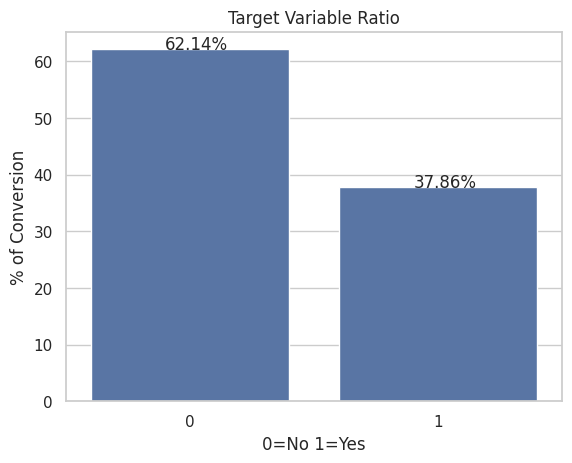

In [38]:
# Percentage of Convered data
ax=sns.barplot(x='Converted', y='Converted', data=df, estimator=lambda x: len(x) / len(df) * 100)
for p in ax.patches:
        ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.3, p.get_height()))
plt.title('Target Variable Ratio')
plt.xlabel('0=No 1=Yes')
plt.xticks(rotation=0)
plt.ylabel('% of Conversion')
plt.show()

Inference: Around 37% of the leads have been converted into customers.

######Categorical Variables

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Do Not Call                             9074 non-null   object 
 4   Converted                               9074 non-null   int64  
 5   TotalVisits                             9074 non-null   float64
 6   Total Time Spent on Website             9074 non-null   int64  
 7   Page Views Per Visit                    9074 non-null   float64
 8   Last Activity                           9074 non-null   object 
 9   What is your current occupation         9074 non-null   object 
 10  Search                                  9074 non-null   object 
 

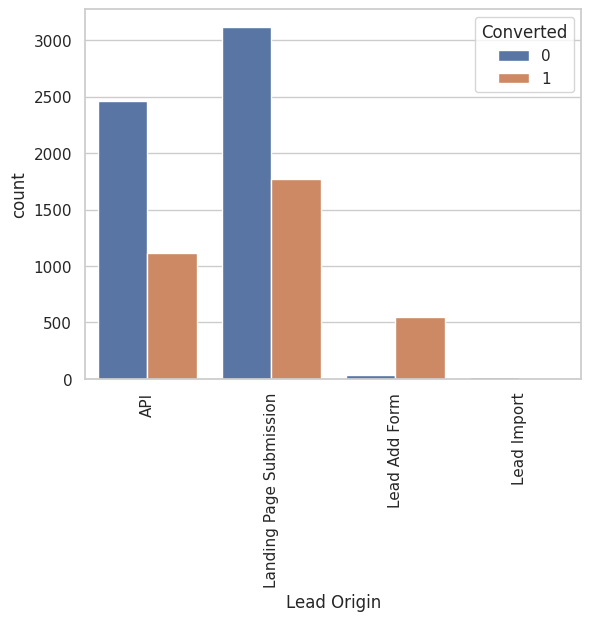

In [40]:
## Lead Origin
sns.countplot(x = "Lead Origin", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

Inference:
- `API` and `Landing page` have brought in maximum leads  but their conversion is subpar
- The leads from `Lead Add Form` are not high but their conversion is phenomenal.
- The leads from `Lead Import` is close to negligible

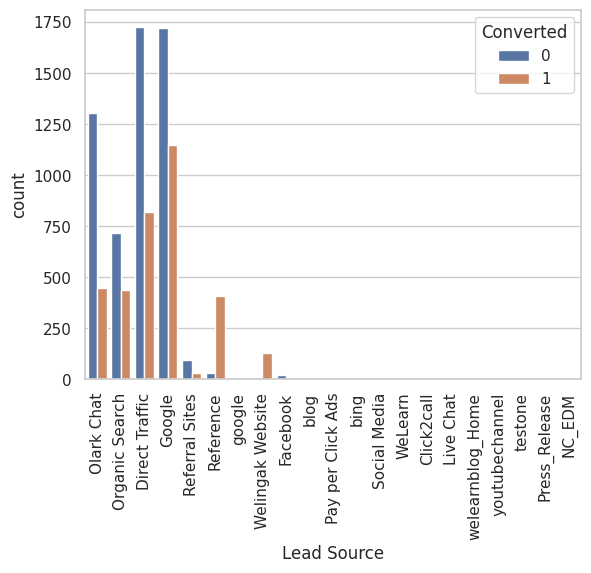

In [41]:
## Lead Origin
sns.countplot(x = "Lead Source", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

In [42]:
# Merging 2 Google into one category
df['Lead Source'] = df['Lead Source'].replace('google', 'Google')

# Merging low frequency items to Others
df['Lead Source'] = df['Lead Source'].replace(['bing', 'Click2call', 'Press_Release',
                                                   'youtubechannel', 'welearnblog_Home',
                                                   'WeLearn', 'blog', 'Pay per Click Ads',
                                                   'testone', 'NC_EDM', 'Live Chat', 'Facebook', 'Social Media'], 'Others')

Replacing values to dervive better insights

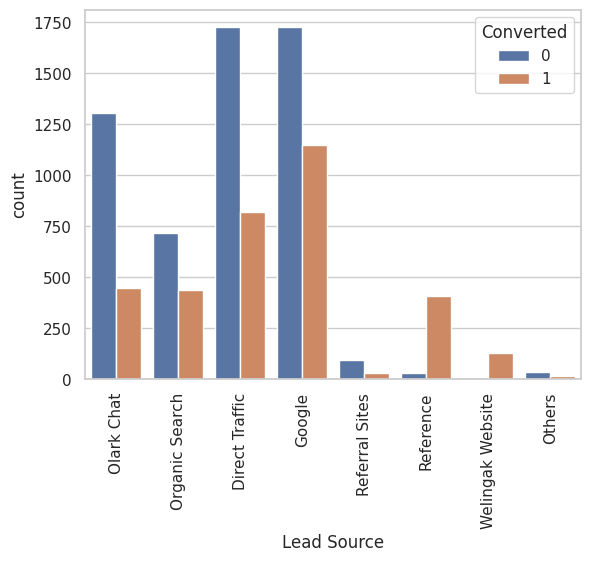

In [43]:
## Visualizing Lead Origin after correction
sns.countplot(x = "Lead Source", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

Inference:
- Maximum leads are brought in by `Direct Traffic` and `Google`, but their conversion rate is below expectations
- `Welingak` and `Reference` have the best conversion rate. Hencce, they could focus more on bringing new leads.

In [44]:
# Checking for high skewness in the data (Threshold - 90 percent)
columns_with_high_skewness = []
total_rows = len(df)
for column in df.columns:
    value_counts = df[column].value_counts()
    if (value_counts.iloc[0] / total_rows) >= 0.9:
        columns_with_high_skewness.append(column)

print(columns_with_high_skewness)

['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations']


In [45]:
# Dropping the columns
df.drop(['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations'], axis = 1,inplace = True)

Dropping these columns due to high skewness in the data

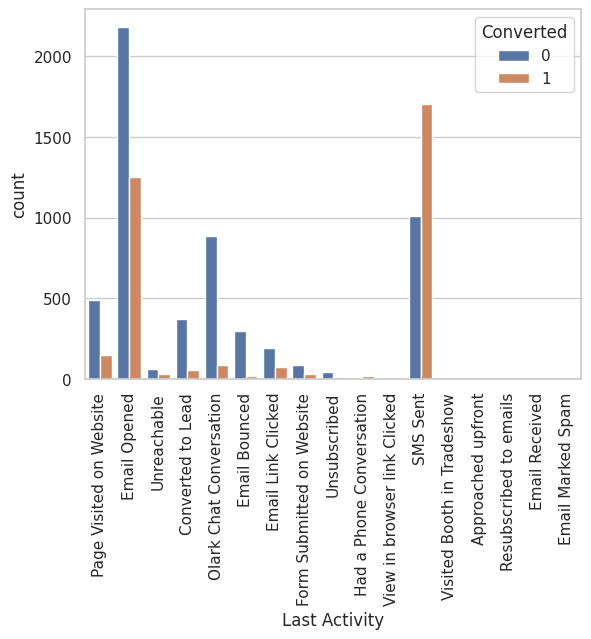

In [46]:
# Visualizing Last Activity
sns.countplot(x = "Last Activity", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

In [47]:
# Merging low frequency items to Others
df['Last Activity'] = df['Last Activity'].replace(['Unreachable','Unsubscribed','Had a Phone Conversation','Approached upfront',
                                                   'View in browser link Clicked','Email Received','Email Marked Spam','Resubscribed to emails',
                                                  'Visited Booth in Tradeshow'], 'Others')

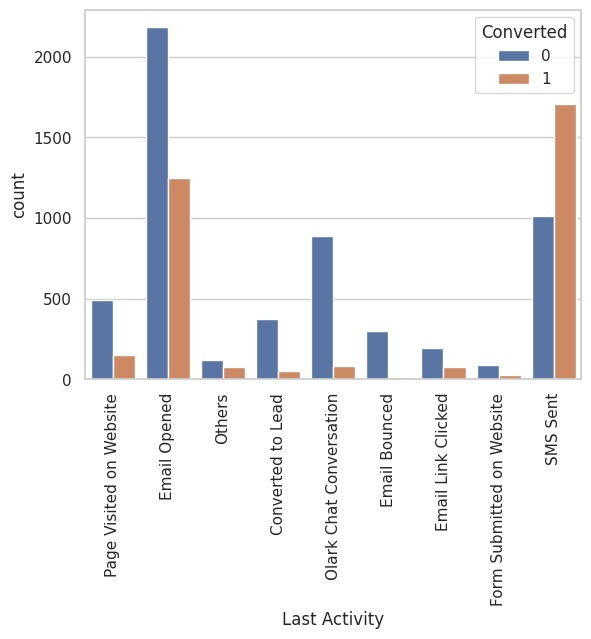

In [48]:
# visualizing Last Activity after replacing values
sns.countplot(x = "Last Activity", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

Inference:
- `Email Opened` and `SMS Sent` have the maximum leads.
- The conversion rate of `SMS Sent` is out of the roof, while measures can be taken to convert leads from email.

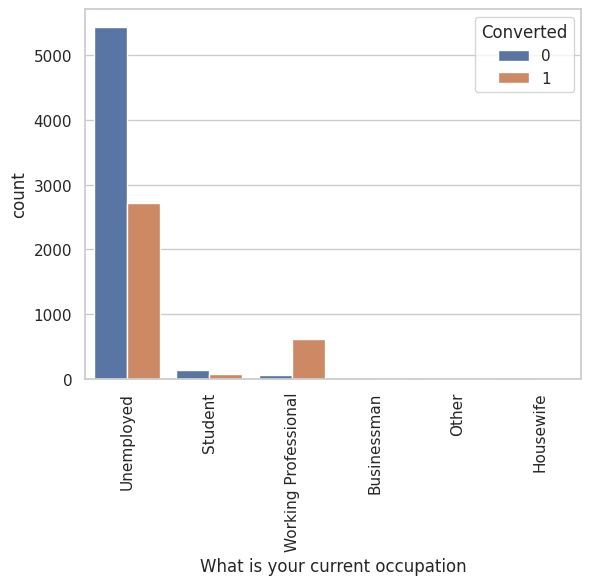

In [49]:
# Current occupation
sns.countplot(x = "What is your current occupation", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

Inference:
- The conversion rate of `Working Professionals` is above par,they can be reached out more.
- Strategies  to derive customers from the `Unemployed` sector can be executed

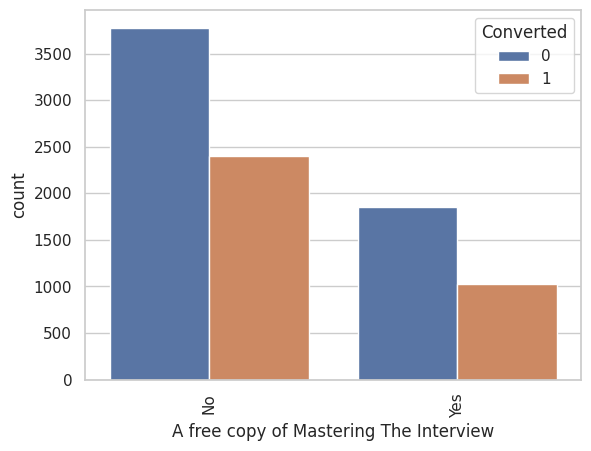

In [50]:
# A free copy of Mastering The Interview
sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

Inference:
More leads are generated from those who do not ask for a free copy of Mastering Interviews.  They can be focused on conversion.

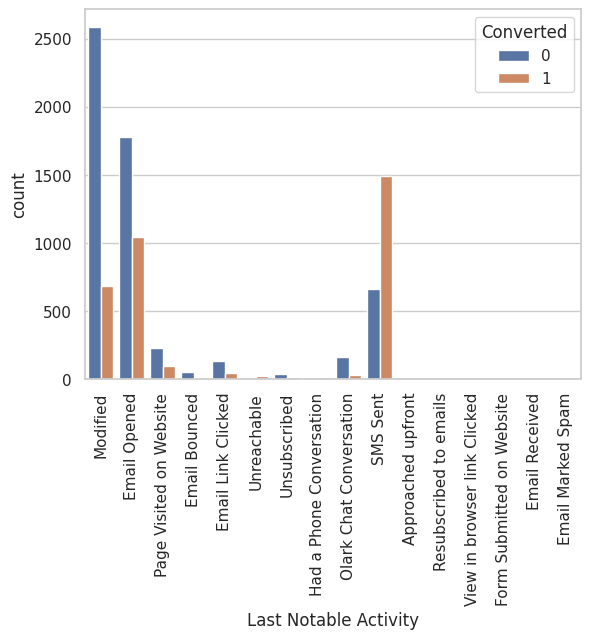

In [51]:
# Last Notable Activity
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

In [52]:
# Merging low frequency items to Others
df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Email Bounced', 'Unsubscribed', 'Unreachable',
                                                                         'Had a Phone Conversation', 'Email Marked Spam',
                                                                         'Resubscribed to emails', 'Approached upfront',
                                                                         'Email Received', 'Form Submitted on Website',
                                                                         'View in browser link Clicked'], 'Others')

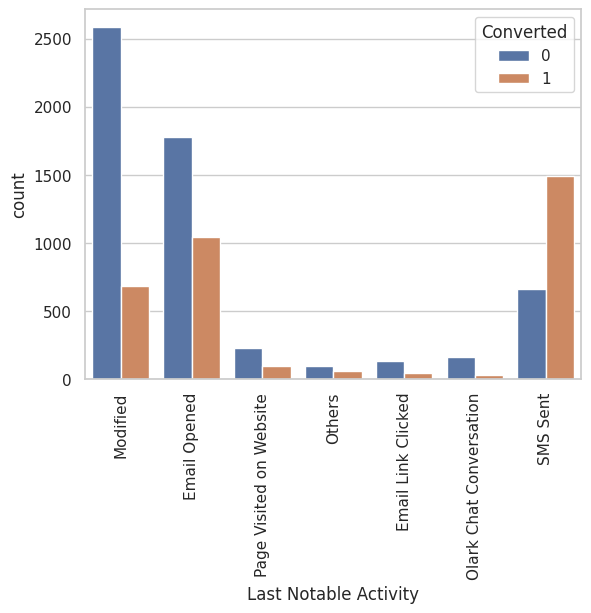

In [53]:
# Re-visulaizing after replacing certain values
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

Inference:
- As seen earlier, `SMS Sent` has the highest conversion.
- We could focus more on `Email Opened` and `Modified`

######Numerical Variables

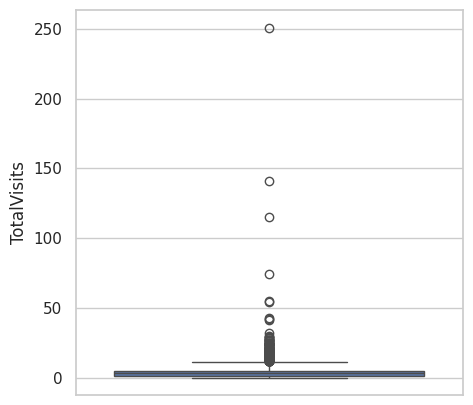

In [54]:
# Total Visits
plt.figure(figsize=(5,5))
sns.boxplot(df['TotalVisits'])
plt.show()

In [55]:
# Statistical analysis of the column
df['TotalVisits'].describe()

,TotalVisits
count,9074.000000
mean,3.456028
std,4.858802
min,0.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,251.000000


In [56]:
# Checking the quantiles
df['TotalVisits'].quantile([0.90, 0.95, 0.97, 0.99] )

,TotalVisits
0.90,7.0
0.95,10.0
0.97,11.0
0.99,17.0


Removing rows above the 97th percentile of TotalVisits and plotting a box plot after rectification

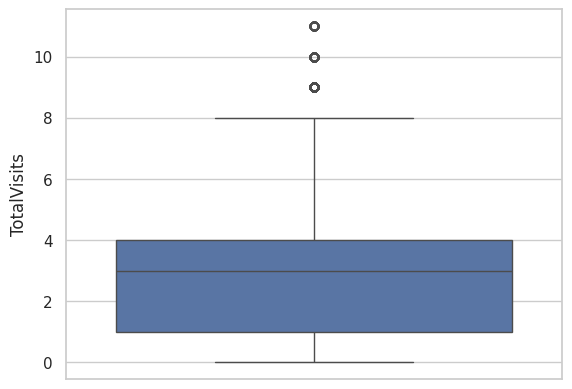

In [57]:
# Bloxplot pf Total Visits
df = df[~(df['TotalVisits'] > 11)]
sns.boxplot(df['TotalVisits'])
plt.show()

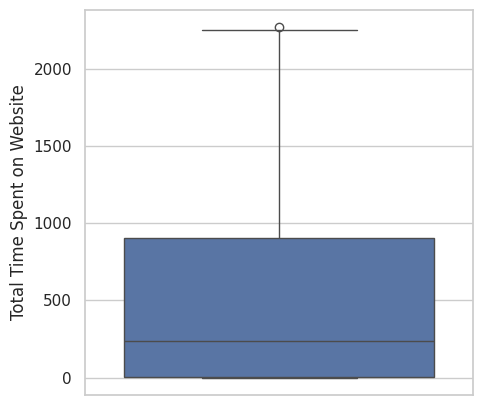

In [58]:
# Total Time Spent on Website
plt.figure(figsize=(5,5))
sns.boxplot(df['Total Time Spent on Website'])
plt.show()

In [59]:
# Statistical analysis of the column
df['Total Time Spent on Website'].describe()

,Total Time Spent on Website
count,8807.000000
mean,476.361304
std,543.671940
min,0.000000
25%,4.000000
50%,239.000000
75%,906.000000
max,2272.000000


In [60]:
# Checking the quantiles
df['Total Time Spent on Website'].quantile([0.90, 0.95, 0.97, 0.99, 1] )

,Total Time Spent on Website
0.90,1369.00
0.95,1552.00
0.97,1652.82
0.99,1838.88
1.00,2272.00


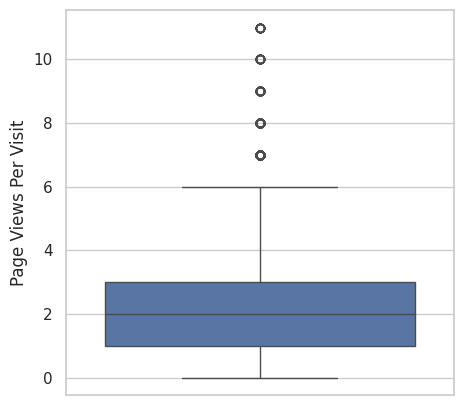

In [61]:
# Page Views Per Visit
plt.figure(figsize=(5,5))
sns.boxplot(df['Page Views Per Visit'])
plt.show()

In [62]:
# Statistical analysis of the column
df['Page Views Per Visit'].describe()

,Page Views Per Visit
count,8807.000000
mean,2.283233
std,1.960508
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,11.000000


In [63]:
# Checking the quantiles
df['Page Views Per Visit'].quantile([0.90, 0.95, 0.97, 0.99,0.995,1] )

,Page Views Per Visit
0.900,5.0
0.950,6.0
0.970,7.0
0.990,8.0
0.995,9.0
1.000,11.0


Removing rows above the 99th percentile of Page Views Per Visit and plotting a box plot after rectification

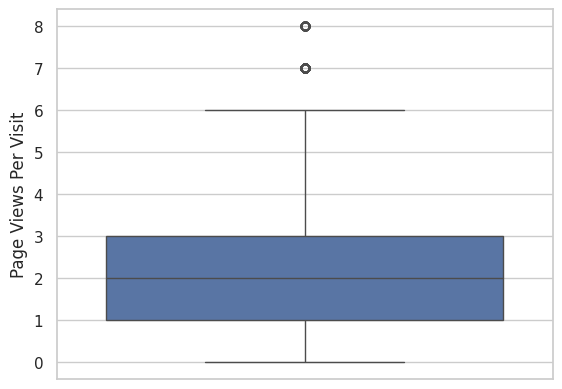

In [64]:
# Bloxplot pf Total Visits
df = df[~(df['Page Views Per Visit'] > 8)]
sns.boxplot(df['Page Views Per Visit'])
plt.show()

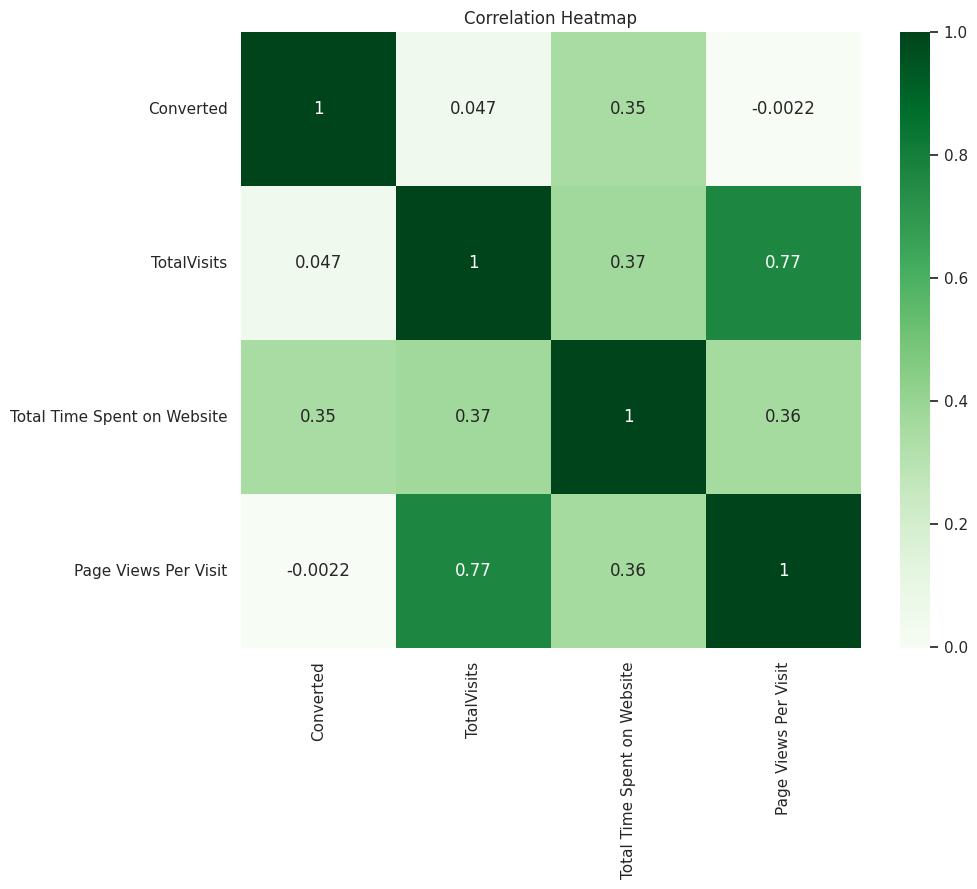

In [65]:
# Plotting a heatmap of the Numerical columns (TotalVisits, Total Time Spent on Website, Page Views Per Visit, Converted)

# Numerical columns
num_cols = ['Converted', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
num_df = df[num_cols]

# Create the heatmap to visualize the correlation
plt.figure(figsize=(10, 8))
sns.heatmap(num_df.corr(), annot=True,cmap = 'Greens')
plt.title('Correlation Heatmap')
plt.show()

Inference
- There is a very strong correlation between `Total Visits` and `Page Views per Visit`, which is around 0.77
- The correlation between `Converted` and `Page Views Per Visit` is negligible and negative.

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8721 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             8721 non-null   object 
 1   Lead Source                             8721 non-null   object 
 2   Converted                               8721 non-null   int64  
 3   TotalVisits                             8721 non-null   float64
 4   Total Time Spent on Website             8721 non-null   int64  
 5   Page Views Per Visit                    8721 non-null   float64
 6   Last Activity                           8721 non-null   object 
 7   What is your current occupation         8721 non-null   object 
 8   A free copy of Mastering The Interview  8721 non-null   object 
 9   Last Notable Activity                   8721 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 749.5+ KB


######Dummy Variables

In [67]:
#Columns with object data type
df.loc[:, df.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Last Activity',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [68]:
# Creating dummy variables using'get_dummies'
dummy = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity',
                            'What is your current occupation',
                            'A free copy of Mastering The Interview',
                            'Last Notable Activity']], drop_first=True, dtype=int)
# Add the results to the master dataframe
df_dummy = pd.concat([df, dummy], axis=1)
df_dummy

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,API,Olark Chat,0,0.0,0,0.00,Page Visited on Website,Unemployed,No,Modified,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
1,API,Organic Search,0,5.0,674,2.50,Email Opened,Unemployed,No,Email Opened,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532,2.00,Email Opened,Student,Yes,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305,1.00,Others,Unemployed,No,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,Landing Page Submission,Google,1,2.0,1428,1.00,Converted to Lead,Unemployed,No,Modified,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,Landing Page Submission,Direct Traffic,1,8.0,1845,2.67,Others,Unemployed,No,Others,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
9236,Landing Page Submission,Direct Traffic,0,2.0,238,2.00,SMS Sent,Unemployed,Yes,SMS Sent,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
9237,Landing Page Submission,Direct Traffic,0,2.0,199,2.00,SMS Sent,Unemployed,Yes,SMS Sent,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
9238,Landing Page Submission,Google,1,3.0,499,3.00,SMS Sent,Unemployed,No,SMS Sent,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1


In [69]:
df_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8721 entries, 0 to 9239
Data columns (total 40 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Origin                                           8721 non-null   object 
 1   Lead Source                                           8721 non-null   object 
 2   Converted                                             8721 non-null   int64  
 3   TotalVisits                                           8721 non-null   float64
 4   Total Time Spent on Website                           8721 non-null   int64  
 5   Page Views Per Visit                                  8721 non-null   float64
 6   Last Activity                                         8721 non-null   object 
 7   What is your current occupation                       8721 non-null   object 
 8   A free copy of Mastering The Interview                8721 non-

In [70]:
#Dropping unnecessary colums
df_dummy.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'What is your current occupation',
               'A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1, inplace=True)
df_dummy.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [71]:
#Dropping Target variable
X = df_dummy.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0.0,0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0
4,2.0,1428,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [72]:
# Inserting target variable in y
y = df_dummy['Converted']
y.head()

,Converted
0,0
1,0
2,1
3,0
4,1


In [73]:
# Split the dataset into 80% and 20% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

In [74]:
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
7553,0.000000,0.000000,0.000,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3197,0.000000,0.000000,0.000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
6679,0.181818,0.075704,0.250,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0
3331,0.181818,0.031250,0.250,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
883,0.454545,0.052817,0.625,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0


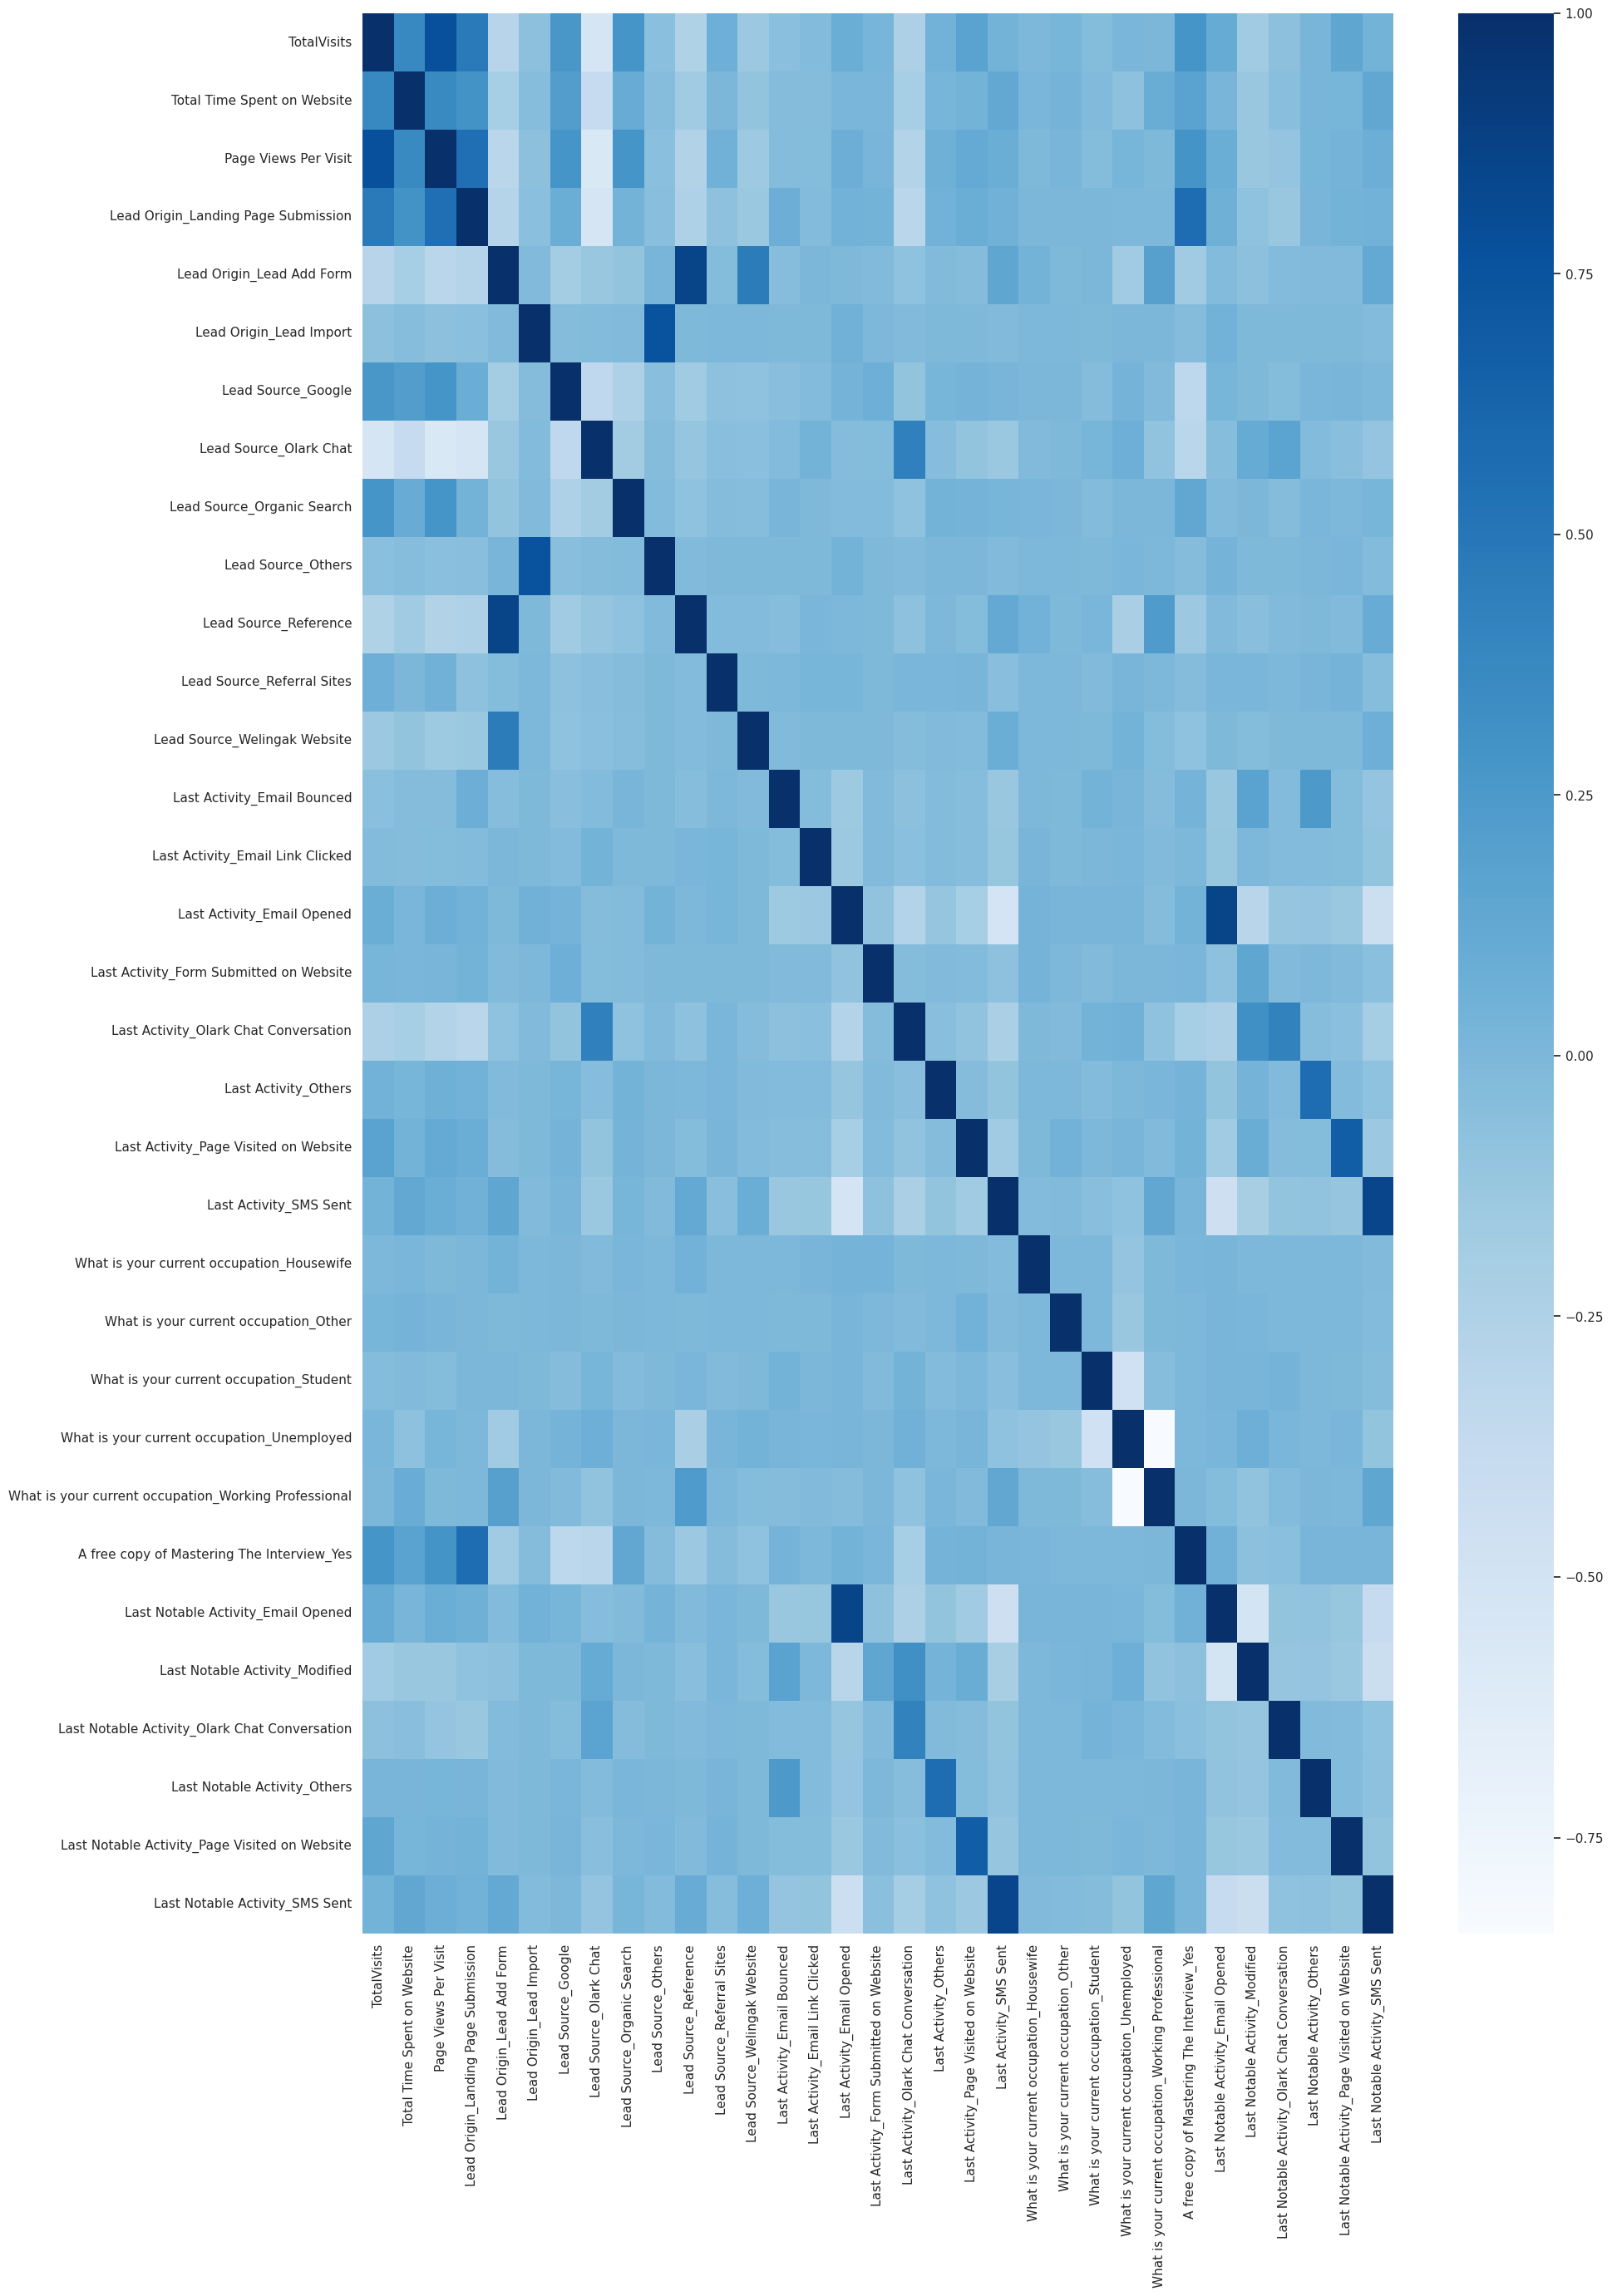

In [75]:
# Checking correlation among varibles using Heatmap
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr(), cmap='Blues')
plt.show()

####Model Building

In [76]:
#Importing necessary libraries
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [77]:
# Running RFE with 15 variables as output
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=15)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=15)

In [78]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 13),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 10),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 19),
 ('Lead Source_Others', False, 9),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 11),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 6),
 ('Last Activity_Email Opened', False, 4),
 ('Last Activity_Form Submitted on Website', False, 15),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', False, 5),
 ('Last Activity_Page Visited on Website', False, 16),
 ('Last Activity_SMS Sent', False, 3),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Other', False, 

In [79]:
# Storing columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [80]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [81]:
# Importing statsmodels
import statsmodels.api as sm

######Model - 1

In [82]:
# Adding constant to X_train
X_train_sm = sm.add_constant(X_train)

# Fitting logistic regression model
logm1 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = logm1.fit()

# Displaying summary
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6976
Model:                            GLM   Df Residuals:                     6960
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2892.6
Date:                Mon, 18 Nov 2024   Deviance:                       5785.2
Time:                        17:17:31   Pearson chi2:                 7.06e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.3894
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [83]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [84]:
# VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,58.26
6,Lead Source_Reference,44.95
7,Lead Source_Welingak Website,14.28
12,What is your current occupation_Unemployed,8.00
2,Page Views Per Visit,7.26
0,TotalVisits,6.39
5,Lead Source_Olark Chat,2.72
1,Total Time Spent on Website,2.33
13,What is your current occupation_Working Professional,1.79
9,Last Activity_Olark Chat Conversation,1.44


Dropping 'What is your current occupation_Housewife' because of high p-Value (1.0) and rebuilding model

In [85]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

######Model - 2

In [86]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6976
Model:                            GLM   Df Residuals:                     6961
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2895.5
Date:                Mon, 18 Nov 2024   Deviance:                       5790.9
Time:                        17:19:21   Pearson chi2:                 7.07e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.3889
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8170      0.570     -1.433      0.152      -1.935       0.301
TotalVisits                                              1.6681      0.225      7.427      0.000       1.228       2.108
Total Time Spent on Website                              4.6395      0.158     29.290      0.000       4.329       4.950
Page Views Per Visit                                    -0.8969      0.239     -3.751      0.000      -1.366      -0.428
Lead Origin_Lead Add Form                                2.8966      0.899      3.222      0.001       1.134       4.659
Lead Origin_Lead Import                                  1.4021      0.537      2.611      0.009       0.350       2.454
Lead Source_Olark Chat                                   1.5412      0.125     12.372      0.000       1.297       1.785
Lead Source_Reference                                    1.4161      0.919      1.541      0.123      -0.385       3.218
Lead Source_Welingak Website                            23.8767   1.16e+04      0.002      0.998   -2.27e+04    2.28e+04
Last Activity_Email Bounced                             -1.9354      0.328     -5.909      0.000      -2.577      -1.293
Last Activity_Olark Chat Conversation                   -1.6381      0.164     -9.995      0.000      -1.959      -1.317
What is your current occupation_Student                 -1.6623      0.600     -2.768      0.006      -2.839      -0.485
What is your current occupation_Unemployed              -1.9630      0.562     -3.490      0.000      -3.065      -0.861
What is your current occupation_Working Professional     0.8803      0.588      1.496      0.135      -0.273       2.034
Last Notable Activity_SMS Sent                           1.5781      0.076     20.724      0.000       1.429       1.727
========================================================================================================================
"""

In [87]:
# VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,58.25
6,Lead Source_Reference,44.95
7,Lead Source_Welingak Website,14.28
11,What is your current occupation_Unemployed,7.94
2,Page Views Per Visit,7.25
0,TotalVisits,6.39
5,Lead Source_Olark Chat,2.71
1,Total Time Spent on Website,2.32
12,What is your current occupation_Working Professional,1.78
9,Last Activity_Olark Chat Conversation,1.44


Dropping 'Lead Source_Welingak Website' because of high p-Value (0.998) and rebuilding model

In [88]:
X_train.drop('Lead Source_Welingak Website', axis = 1, inplace = True)

######Model - 3

In [89]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6976
Model:                            GLM   Df Residuals:                     6962
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2901.9
Date:                Mon, 18 Nov 2024   Deviance:                       5803.8
Time:                        17:20:21   Pearson chi2:                 7.26e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3877
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8150      0.570     -1.429      0.153      -1.933       0.303
TotalVisits                                              1.6671      0.225      7.424      0.000       1.227       2.107
Total Time Spent on Website                              4.6370      0.158     29.276      0.000       4.327       4.947
Page Views Per Visit                                    -0.8986      0.239     -3.758      0.000      -1.367      -0.430
Lead Origin_Lead Add Form                                6.3639      0.729      8.728      0.000       4.935       7.793
Lead Origin_Lead Import                                  1.4004      0.537      2.608      0.009       0.348       2.453
Lead Source_Olark Chat                                   1.5378      0.125     12.337      0.000       1.294       1.782
Lead Source_Reference                                   -2.0529      0.752     -2.731      0.006      -3.526      -0.579
Last Activity_Email Bounced                             -1.9184      0.323     -5.931      0.000      -2.552      -1.284
Last Activity_Olark Chat Conversation                   -1.6339      0.164     -9.992      0.000      -1.954      -1.313
What is your current occupation_Student                 -1.6628      0.600     -2.770      0.006      -2.839      -0.486
What is your current occupation_Unemployed              -1.9633      0.562     -3.491      0.000      -3.066      -0.861
What is your current occupation_Working Professional     0.8792      0.588      1.494      0.135      -0.274       2.033
Last Notable Activity_SMS Sent                           1.5783      0.076     20.731      0.000       1.429       1.727
========================================================================================================================
"""

In [90]:
# VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,7.93
2,Page Views Per Visit,7.25
0,TotalVisits,6.39
3,Lead Origin_Lead Add Form,4.60
6,Lead Source_Reference,4.17
5,Lead Source_Olark Chat,2.70
1,Total Time Spent on Website,2.32
11,What is your current occupation_Working Professional,1.78
8,Last Activity_Olark Chat Conversation,1.44
12,Last Notable Activity_SMS Sent,1.44


Dropping 'What is your current occupation_Working Professional' because of high p-Value (0.135) and rebuilding model

######Model - 4

In [91]:
X_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

In [92]:
# Refit the model with the new set of features
X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6976
Model:                            GLM   Df Residuals:                     6963
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2902.9
Date:                Mon, 18 Nov 2024   Deviance:                       5805.8
Time:                        17:21:25   Pearson chi2:                 7.27e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3875
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.0007      0.193     -0.004      0.997      -0.378       0.377
TotalVisits                                    1.6660      0.225      7.420      0.000       1.226       2.106
Total Time Spent on Website                    4.6352      0.158     29.266      0.000       4.325       4.946
Page Views Per Visit                          -0.9027      0.239     -3.774      0.000      -1.371      -0.434
Lead Origin_Lead Add Form                      6.3614      0.729      8.725      0.000       4.932       7.790
Lead Origin_Lead Import                        1.4045      0.535      2.624      0.009       0.355       2.454
Lead Source_Olark Chat                         1.5359      0.125     12.325      0.000       1.292       1.780
Lead Source_Reference                         -2.0524      0.752     -2.730      0.006      -3.526      -0.579
Last Activity_Email Bounced                   -1.9108      0.323     -5.923      0.000      -2.543      -1.278
Last Activity_Olark Chat Conversation         -1.6304      0.163     -9.982      0.000      -1.950      -1.310
What is your current occupation_Student       -2.4757      0.272     -9.112      0.000      -3.008      -1.943
What is your current occupation_Unemployed    -2.7761      0.172    -16.112      0.000      -3.114      -2.438
Last Notable Activity_SMS Sent                 1.5808      0.076     20.782      0.000       1.432       1.730
==============================================================================================================
"""

In [93]:
# VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,6.81
0,TotalVisits,6.17
10,What is your current occupation_Unemployed,5.28
3,Lead Origin_Lead Add Form,4.47
6,Lead Source_Reference,4.11
5,Lead Source_Olark Chat,2.24
1,Total Time Spent on Website,2.14
8,Last Activity_Olark Chat Conversation,1.43
11,Last Notable Activity_SMS Sent,1.40
9,What is your current occupation_Student,1.11


All VIF values are below 10 and p-value is also below 0.05. Hence, we can proceed with this model.

####Prediction

In [94]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

,0
7553,0.224273
3197,0.053590
6679,0.087170
3331,0.072108
883,0.087951
3228,0.837987
8946,0.996276
5716,0.224273
2668,0.454012
1261,0.994322


In [95]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.22427277, 0.05359048, 0.08716951, 0.07210793, 0.08795081,
       0.8379874 , 0.99627605, 0.22427277, 0.45401229, 0.99432169])

In [96]:
# Data frame with convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final

,Converted,Conversion_Prob
0,0,0.224273
1,0,0.053590
2,0,0.087170
3,0,0.072108
4,0,0.087951
...,...,...
6971,1,0.716814
6972,1,0.870336
6973,0,0.493111
6974,1,0.930417


In [97]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.224273,0
1,0,0.053590,0
2,0,0.087170,0
3,0,0.072108,0
4,0,0.087951,0


####Model Evaluation

In [98]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [99]:
# Creating confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3883,  481],
       [ 800, 1812]])

In [100]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8163704128440367

Our model has achieved an accuracy of 82%

In [101]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1]
# Substituting the value of false negatives
FN = confusion[1,0]

In [102]:
# Creating a cusom function to calculate specificity and sensitivity.
def calculate_sensitivity_specificity(TP, TN, FP, FN):
    sensitivity = "The sensitivity is " + str(TP / (TP + FN))
    specificity = "The specificity is " + str(TN / (TN + FP))
    return sensitivity + ', ' + specificity

In [103]:
# Calculating sensitivity and specificity

calculate_sensitivity_specificity(TP, TN, FP, FN)

'The sensitivity is 0.6937212863705973, The specificity is 0.8897800183318056'

With the current cut off as 0.5 we have around 82% accuracy, sensitivity of around 69% and specificity of around 89%.

######Optimise Cut Off(ROC Curve)

Previously, we had randomly selected the cut off value as 0.5. Now, let's find the optimum one.

In [104]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [105]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

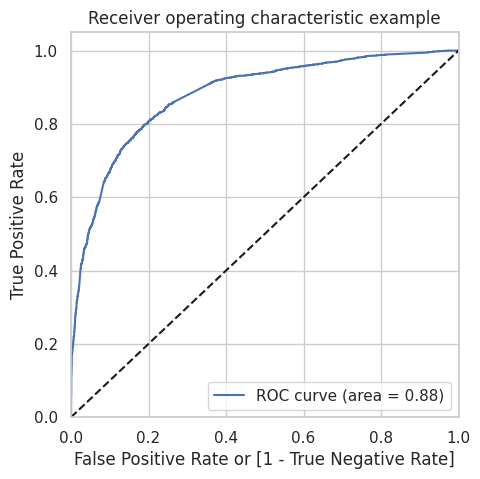

In [106]:
# Calling the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

We can observe that the area under the ROC Curve is 0.88

In [107]:
# Creating columns with different probability cutoffs
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.224273,0,1,1,1,0,0,0,0,0,0,0
1,0,0.053590,0,1,0,0,0,0,0,0,0,0,0
2,0,0.087170,0,1,0,0,0,0,0,0,0,0,0
3,0,0.072108,0,1,0,0,0,0,0,0,0,0,0
4,0,0.087951,0,1,0,0,0,0,0,0,0,0,0


In [108]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1

    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
cutoff_df

,prob,accuracy,sensitivity,specificity
0.0,0.0,0.374427,1.000000,0.000000
0.1,0.1,0.605075,0.959035,0.393217
0.2,0.2,0.735378,0.918070,0.626031
0.3,0.3,0.795728,0.823124,0.779331
0.4,0.4,0.811783,0.761868,0.841659
0.5,0.5,0.816370,0.693721,0.889780
0.6,0.6,0.798452,0.574273,0.932631
0.7,0.7,0.785694,0.504211,0.954170
0.8,0.8,0.766198,0.423430,0.971357
0.9,0.9,0.717173,0.261868,0.989688


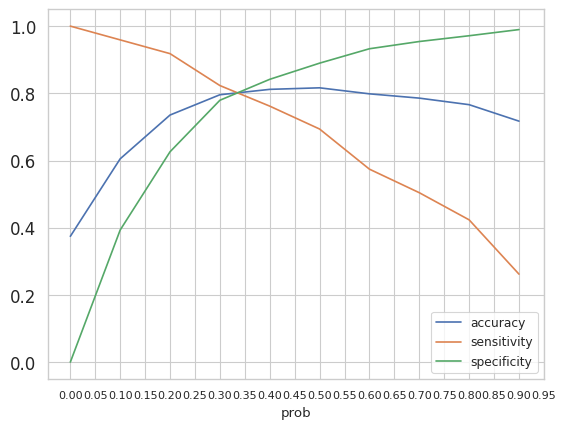

In [109]:
# Plotting the accuracy, sensitivity, specificity
sns.set_style("whitegrid")
sns.set_context("paper")
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.yticks(size=12)
plt.show()

As seen in the above graph, we can take 0.33 as our optimum cut-off point.

In [110]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.33 else 0)
y_train_pred_final

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.224273,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.053590,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.087170,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.072108,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.087951,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6971,1,0.716814,1,1,1,1,1,1,1,1,1,0,0,1
6972,1,0.870336,1,1,1,1,1,1,1,1,1,1,0,1
6973,0,0.493111,0,1,1,1,1,1,0,0,0,0,0,1
6974,1,0.930417,1,1,1,1,1,1,1,1,1,1,1,1


In [111]:
# Checking overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8026089449541285

In [112]:
# Creating confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3492,  872],
       [ 505, 2107]])

In [113]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1]
# Substituting the value of false negatives
FN = confusion2[1,0]

In [114]:
# Calculating sensitivity and specificity
calculate_sensitivity_specificity(TP, TN, FP, FN)

'The sensitivity is 0.8066615620214395, The specificity is 0.8001833180568286'

With the current cut off as 0.35 we have accuracy, sensitivity and specificity of around 80%.

######Prediction on Test Set

In [115]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [116]:
# Substituting all the columns in the final train model
col = X_train.columns

In [117]:
# Select the columns in X_test
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Reference,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,What is your current occupation_Student,What is your current occupation_Unemployed,Last Notable Activity_SMS Sent
668,1.0,0.000000,0.000000,0.00000,0,0,1,0,0,0,0,1,0
6466,1.0,0.000000,0.000000,0.00000,0,0,1,0,0,0,0,1,1
8985,1.0,0.181818,0.013644,0.25000,0,0,0,0,0,0,0,1,0
2622,1.0,0.181818,0.500880,0.25000,0,0,0,0,0,0,0,0,1
8959,1.0,0.272727,0.640845,0.37500,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3096,1.0,0.000000,0.000000,0.00000,0,0,1,0,0,0,0,1,0
8804,1.0,0.727273,0.599032,0.33375,0,0,0,0,0,0,0,1,1
5633,1.0,0.000000,0.000000,0.00000,0,0,1,0,0,0,0,0,1
6044,1.0,0.000000,0.000000,0.00000,0,0,1,0,0,1,0,1,0


In [118]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to a dataframe
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
# Removing index for both dataframes to append them side by side
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.224273
1,1,0.584167
2,1,0.066835
3,1,0.981640
4,1,0.956295


In [119]:
# Making prediction using cut off value cut off 0.33
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.33 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.224273,0
1,1,0.584167,1
2,1,0.066835,0
3,1,0.981640,1
4,1,0.956295,1
...,...,...,...
1740,0,0.224273,0
1741,0,0.923511,1
1742,1,0.957549,1
1743,0,0.053590,0


In [120]:
# Checking overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7954154727793696

In [121]:
# Creating confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[854, 221],
       [136, 534]])

In [122]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1]
# Substituting the value of false negatives
FN = confusion2[1,0]

In [123]:
calculate_sensitivity_specificity(TP, TN, FP, FN)

'The sensitivity is 0.7970149253731343, The specificity is 0.7944186046511628'

With the current cut off as 0.33 we have accuracy, sensitivity and specificity of around 79%.

######Precision - Recall

In [124]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3883,  481],
       [ 800, 1812]])

In [125]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1]
# Substituting the value of false negatives
FN = confusion[1,0]

In [126]:
# Creating a custm function for calculating precision and recall
def calculate_precision_recall(TP, TN, FP, FN):
    precision = "The precision is " + str(TP / (TP + FP))
    recall = "The recall is " + str(TP / (TP + FN))
    return precision + ', ' + recall

In [127]:
# Calculating Precision and Recall
calculate_precision_recall(TP, TN, FP, FN)

'The precision is 0.7902311382468382, The recall is 0.6937212863705973'

With the current cut off as 0.33 we have Precision around 79% and Recall around 69%

######Precison - Recall trade off

In [128]:
from sklearn.metrics import precision_recall_curve

In [129]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6971    1
 6972    1
 6973    0
 6974    1
 6975    0
 Name: Converted, Length: 6976, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6971    1
 6972    1
 6973    0
 6974    1
 6975    0
 Name: Predicted, Length: 6976, dtype: int64)

In [130]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

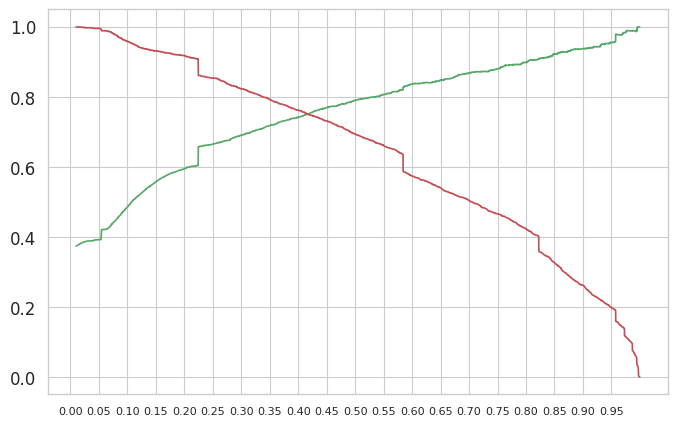

In [131]:
# Plotting the precision recall curve
plt.figure(figsize=(8,5))
sns.set_style("whitegrid")
sns.set_context("paper")
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.yticks(size=12)
plt.show()

The precision and Recall seem to have trade-off at 0.42, hence 0.42 will be used as threshold on test data.

In [132]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.224273,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.053590,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.087170,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.072108,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.087951,0,1,0,0,0,0,0,0,0,0,0,0


In [133]:
# Calculating Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8142201834862385

In [134]:
# Creating confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3725,  639],
       [ 657, 1955]])

In [135]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1]
# Substituting the value of false negatives
FN = confusion2[1,0]

In [136]:
# Calculating precision and recall
calculate_precision_recall(TP, TN, FP, FN)

'The precision is 0.7536622976098689, The recall is 0.748468606431853'

With the current cut off as 0.42 we have Precision and Recall around 75%.

######Prediction on Test Set

In [137]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Remove index for both dataframes to append them side by side
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.224273
1,1,0.584167
2,1,0.066835
3,1,0.981640
4,1,0.956295


In [138]:
# Making prediction using cut off 0.42
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.224273,0
1,1,0.584167,1
2,1,0.066835,0
3,1,0.981640,1
4,1,0.956295,1
...,...,...,...
1740,0,0.224273,0
1741,0,0.923511,1
1742,1,0.957549,1
1743,0,0.053590,0


In [139]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8074498567335243

In [140]:
# Creating confusion matrix
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[923, 152],
       [184, 486]])

In [141]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1]
# Substituting the value of false negatives
FN = confusion2[1,0]

In [142]:
# Calculating precision and recall
calculate_precision_recall(TP, TN, FP, FN)

'The precision is 0.7617554858934169, The recall is 0.7253731343283583'

With the current cut off as 0.42 we have Precision around 76% and Recall around 73%

In [143]:
# Extracting coefficients and corresponding variable names
coefficients = res.params.iloc[1:]  # excluding the intercept
variable_names = coefficients.index

# Calculating the absolute coefficients
absolute_coefficients = abs(coefficients)

# Sorting the variables based on absolute coefficients
sorted_variables = absolute_coefficients.sort_values(ascending=False)

# Extracting the top three variables
top_three_variables = sorted_variables.head(3)

# Printing the top three variables and their corresponding coefficients
print("Top three variables contributing most to conversion probability:")
for variable, coefficient in top_three_variables.items():
    print(f"{variable}: {coefficient:.4f}")

Top three variables contributing most to conversion probability:
Lead Origin_Lead Add Form: 6.3614
Total Time Spent on Website: 4.6352
What is your current occupation_Unemployed: 2.7761


Sorted Values according to its cofficiency

In [144]:
sorted_variables

,0
Lead Origin_Lead Add Form,6.361415
Total Time Spent on Website,4.635236
What is your current occupation_Unemployed,2.776117
What is your current occupation_Student,2.475666
Lead Source_Reference,2.052375
Last Activity_Email Bounced,1.910808
TotalVisits,1.666017
Last Activity_Olark Chat Conversation,1.630366
Last Notable Activity_SMS Sent,1.580840
Lead Source_Olark Chat,1.535910


#### RECOMMENDATIONS

1.	Initiatives should be taken to get more leads from Lead Add Form as their conversion rate is above par.
2.	The website can be made more interactive to engage customers and increase the overall time spent on the website, which will indeed increase the conversion as observed in the EDA.
3.  Working Professionals can be targeted more, as they have the spending capacity and willingness to upskill themselves which can also be seen in the analysis.
4.	Students can be avoided as they are already enrolled in a course and might not purchase a course for industry professionals this early in their careers.
5.	Loyalty programs can be initiated for our existing customers to get more references from them as the conversion rate is very high.
6.	Similarly, leads whose last Notable Activity was SMS and who visit the website repeatedly on a regular basis can be nudged towards conversion.

#### CONCLUSION

- Our model development process involved several key steps to ensure accuracy and reliability. We began by applying one hot encoding to transform categorical variables into a format suitable for modeling.
- Next, we used Recursive Feature Elimination (RFE) to select the most important features, streamlining our model and improving its predictive power.
- Building on this foundation, we constructed logistic regression models and iteratively optimized them based on improving p-values. This iterative approach allowed us to fine-tune the models for optimal performance.
- Through this process, we achieved an impressive accuracy rate of 80.74% and a precision rate of 76.17%, demonstrating the effectiveness of our approach in predicting lead conversions.
- Our model's performance was further validated through rigorous testing on unseen data, confirming its reliability and generalizability in real-world scenarios.
- Overall, our methodical approach and attention to detail have resulted in a robust predictive model that can provide valuable insights for improving lead conversion rates and optimizing resource allocation strategies.